In [1]:
# Importing necessary libraries 
import csv
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from statistics import mean

In [2]:
def read_csv(file_path):
    with open(file_path, mode='r') as file:
        reader = csv.DictReader(file)
        return [row for row in reader]

In [3]:
def parse_date(date_str):
    return datetime.strptime(date_str, '%Y-%m-%d')

In [4]:
def linear_regression(x, y):
    n = len(x)
    x_mean = mean(x)
    y_mean = mean(y)
    numerator = sum((x[i] - x_mean) * (y[i] - y_mean) for i in range(n))
    denominator = sum((x[i] - x_mean) ** 2 for i in range(n))
    slope = numerator / denominator
    intercept = y_mean - slope * x_mean
    return slope, intercept

def predict(slope, intercept, x):
    return slope * x + intercept

In [5]:
# Load data from CSV files
nepse_data = read_csv('nepse.csv')
bank_interest_rates = read_csv('bank_interest.csv')
gold_prices = read_csv('gold_silver_prices.csv')
commodities_prices = read_csv('commodities_prices.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'nepse.csv'

In [ ]:
start_date = datetime(2023, 1, 1)
for i, row in enumerate(nepse_data):
    row['Date'] = (start_date + timedelta(days=i)).strftime('%Y-%m-%d')


In [ ]:
amount_npr = 10000
exchange_rate = 132
amount_usd = amount_npr / exchange_rate
print(f"Amount in USD: {amount_usd}")

Amount in USD: 75.75757575757575


In [ ]:
print("\nNEPSE Share Bazar Performance:")
for row in nepse_data[:5]:  
    print(row)


NEPSE Share Bazar Performance:
{'Name': 'Aarambha Chautari Laghubitta Bittiya Sanstha Limited', 'Symbol': 'ACLBSL', 'Conf': '42.33', 'Open': '911.20', 'High': '948.50', 'Low': '911.00', 'Close': '911.00', 'VWAP': '919.48', 'Vol': '7,719.00', 'Prev. Close': '926.00', 'Turnover': '7,097,469.60', 'Trans': '91', 'Diff': '-15.00', 'Range': '37.50', 'Diff %': '-1.62', 'Range %': '4.12', 'VWAP %': '-0.93', '120 Days': '676.69', '180 Days': '634.75', '52 Weeks High': '963.90', '52 Weeks Low': '500.10', 'Date': '2023-01-01'}
{'Name': 'Agricultural Development Bank Limited', 'Symbol': 'ADBL', 'Conf': '42.79', 'Open': '267.00', 'High': '267.30', 'Low': '260.00', 'Close': '261.00', 'VWAP': '262.18', 'Vol': '30,737.00', 'Prev. Close': '270.00', 'Turnover': '8,058,622.40', 'Trans': '252', 'Diff': '-9.00', 'Range': '7.30', 'Diff %': '-3.33', 'Range %': '2.81', 'VWAP %': '-0.45', '120 Days': '240.22', '180 Days': '245.26', '52 Weeks High': '292.90', '52 Weeks Low': '223.00', 'Date': '2023-01-02'}
{'N

In [ ]:
nepse_dates = [parse_date(row['Date']) for row in nepse_data]
nepse_indices = {key: [float(row[key].replace(',', '')) for row in nepse_data] for key in nepse_data[0] if key not in ['Date', 'Name', 'Symbol']}


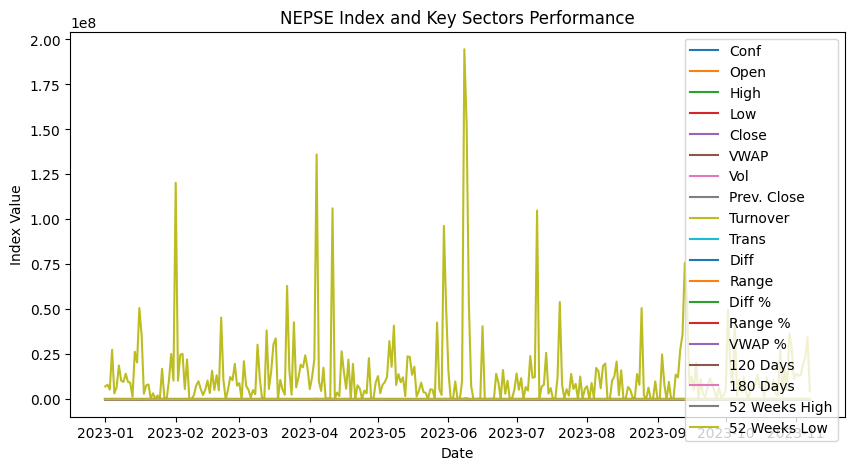

In [ ]:
# Plot NEPSE index and key sectors
plt.figure(figsize=(10, 5))
for sector, values in nepse_indices.items():
    plt.plot(nepse_dates, values, label=sector)
plt.title('NEPSE Index and Key Sectors Performance')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
plt.show()

In [ ]:
# Bank Fixed Deposit and Savings Interest Rates
print("\nBank Fixed Deposit and Savings Interest Rates:")
for row in bank_interest_rates[:5]:  # Print first 5 rows as a sample
    print(row)



Bank Fixed Deposit and Savings Interest Rates:
{'Bank Name': 'Nepal Bank Ltd.', 'Savings Rate': '5.65%', 'Fixed Rate': '6.75%'}
{'Bank Name': 'Rastriya Banijya Bank', 'Savings Rate': '4.65%', 'Fixed Rate': '6.40%'}
{'Bank Name': 'Nabil Bank', 'Savings Rate': '5.15%', 'Fixed Rate': '6.75%'}
{'Bank Name': 'Nepal Investment Mega Bank', 'Savings Rate': '4.50%', 'Fixed Rate': '7.00%'}
{'Bank Name': 'Standard Chartered Bank', 'Savings Rate': '4.55%', 'Fixed Rate': '7.00%'}


In [ ]:
# Convert interest rates to numeric values, handling non-numeric cases
def convert_to_float(rate_str):
    try:
        return float(rate_str.replace('%', ''))
    except ValueError:
        return None

bank_names = [row['Bank Name'] for row in bank_interest_rates]
savings_rates = [convert_to_float(row['Savings Rate']) for row in bank_interest_rates]
fixed_rates = [convert_to_float(row['Fixed Rate']) for row in bank_interest_rates]


In [ ]:
# Filter out None values for plotting
valid_indices = [i for i, rate in enumerate(savings_rates) if rate is not None and fixed_rates[i] is not None]
bank_names = [bank_names[i] for i in valid_indices]
savings_rates = [savings_rates[i] for i in valid_indices]
fixed_rates = [fixed_rates[i] for i in valid_indices]


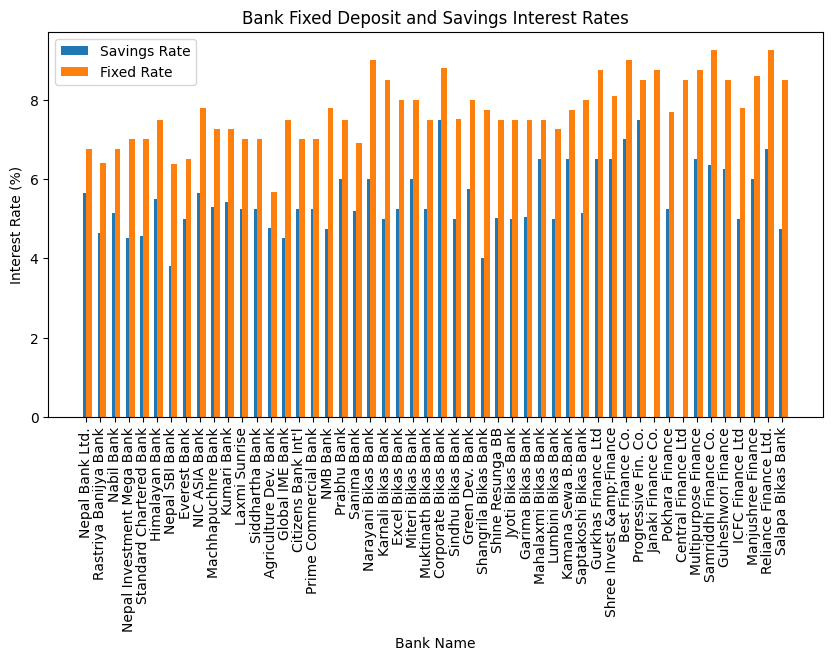

In [ ]:
# Plot Bank Fixed Deposit and Savings Interest Rates
x = range(len(bank_names))
plt.figure(figsize=(10, 5))
plt.bar(x, savings_rates, width=0.4, label='Savings Rate', align='center')
plt.bar(x, fixed_rates, width=0.4, label='Fixed Rate', align='edge')
plt.xticks(x, bank_names, rotation='vertical')
plt.title('Bank Fixed Deposit and Savings Interest Rates')
plt.xlabel('Bank Name')
plt.ylabel('Interest Rate (%)')
plt.legend()
plt.show()

In [ ]:
print("\nGold and Silver Price Trends:")
for row in gold_prices[:5]:  
    print(row)


Gold Price Trends:
{'Date': '2024-05-30', 'Gold 999.9': 'Rs. 120455.00', 'Gold 995.0': 'Rs. 0.00', 'Silver': 'Rs. 1629.00'}
{'Date': '2024-05-29', 'Gold 999.9': 'Rs. 118485.00', 'Gold 995.0': 'Rs. 0.00', 'Silver': 'Rs. 1654.50'}
{'Date': '2024-05-28', 'Gold 999.9': 'Rs. 117970.00', 'Gold 995.0': 'Rs. 0.00', 'Silver': 'Rs. 1646.00'}
{'Date': '2024-05-27', 'Gold 999.9': 'Rs. 117625.00', 'Gold 995.0': 'Rs. 0.00', 'Silver': 'Rs. 1612.00'}
{'Date': '2024-05-26', 'Gold 999.9': 'Rs. 117370.00', 'Gold 995.0': 'Rs. 0.00', 'Silver': 'Rs. 1590.50'}


In [ ]:
gold_dates = []
gold_values = []
silver_values = []

for row in gold_prices:
    date_str = row['Date']
    if date_str != '0000-00-00':
        try:
            date = parse_date(date_str)
            gold_dates.append(date)
            gold_value = row['Gold 999.9'].replace('Rs. ', '').replace(',', '')
            gold_values.append(float(gold_value))
            silver_value = row['Silver'].replace('Rs. ', '').replace(',', '')
            silver_values.append(float(silver_value))
        except ValueError:
            print(f"Ignoring invalid date: {date_str}")



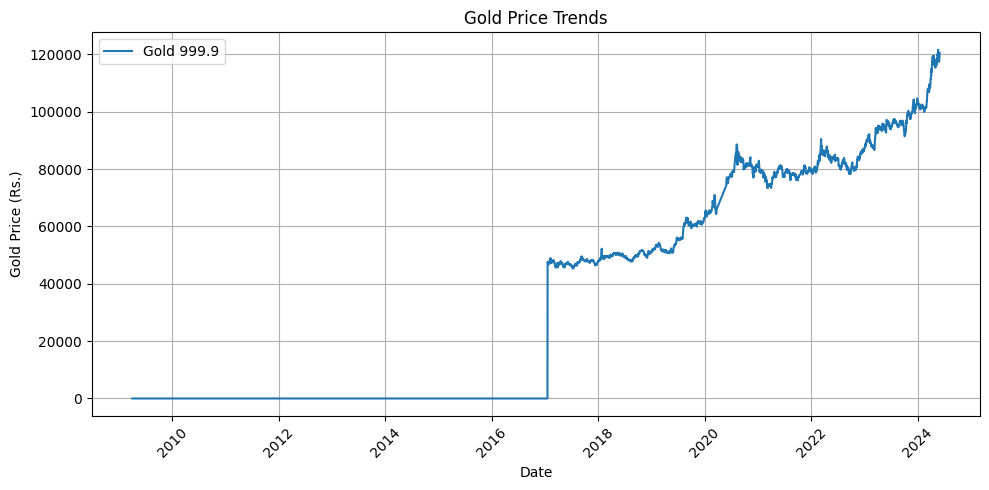

In [ ]:
# Plotting Gold Prices
plt.figure(figsize=(10, 5))
plt.plot(gold_dates, gold_values, label='Gold 999.9')
plt.xlabel('Date')
plt.ylabel('Gold Price (Rs.)')
plt.title('Gold Price Trends')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

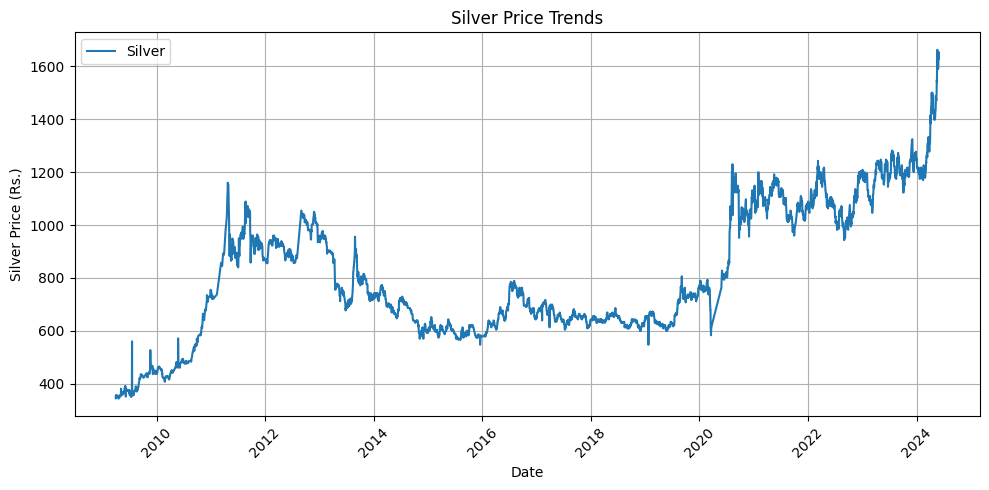

In [ ]:
# Plotting Silver Prices
plt.figure(figsize=(10, 5))
plt.plot(gold_dates, silver_values, label='Silver')
plt.xlabel('Date')
plt.ylabel('Silver Price (Rs.)')
plt.title('Silver Price Trends')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Commodities Price Trends
print("\nCommodities Price Trends:")
for row in commodities_prices[:5]:  
    print(row)


Commodities Price Trends:
{'Date': '2019-01-01', 'Rice_Price': '40', 'Wheat_Price': '30'}
{'Date': '2019-06-01', 'Rice_Price': '42', 'Wheat_Price': '32'}
{'Date': '2020-01-01', 'Rice_Price': '44', 'Wheat_Price': '34'}
{'Date': '2020-06-01', 'Rice_Price': '46', 'Wheat_Price': '36'}
{'Date': '2021-01-01', 'Rice_Price': '48', 'Wheat_Price': '38'}


In [ ]:
commodity_dates = [parse_date(row['Date']) for row in commodities_prices]
commodity_values = {key: [float(row[key].replace(',', '')) for row in commodities_prices] for key in commodities_prices[0] if key != 'Date'}


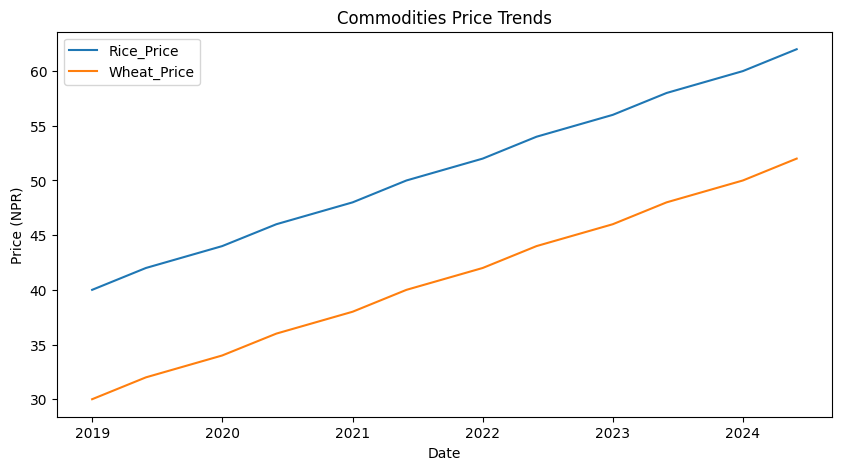

In [ ]:
# Plot Commodities Price Trends
plt.figure(figsize=(10, 5))
for commodity, values in commodity_values.items():
    plt.plot(commodity_dates, values, label=commodity)
plt.title('Commodities Price Trends')
plt.xlabel('Date')
plt.ylabel('Price (NPR)')
plt.legend()
plt.show()

In [ ]:
# Profitability Analysis
print("\nProfitability Analysis:")
nepse_return = (nepse_indices['Close'][-1] - nepse_indices['Close'][0]) / nepse_indices['Close'][0] * 100
print(f"NEPSE Share Bazar: {nepse_return:.2f}% return")



Profitability Analysis:
NEPSE Share Bazar: 49.95% return


In [ ]:
bank_return = (mean(fixed_rates) - mean(savings_rates)) / mean(savings_rates) * 100
print(f"Fixed Deposits: {bank_return:.2f}% return")


Fixed Deposits: 46.39% return


In [ ]:
gold_return = (gold_values[-1] - gold_values[0]) / gold_values[0] * 100
print(f"Gold: {gold_return:.2f}% return")


Gold: -100.00% return


In [ ]:
silver_return = (silver_values[-1] - silver_values[0]) / silver_values[0] * 100
print(f"Silver: {silver_return:.2f}% return")


Silver: -78.42% return


In [ ]:
commodities_returns = {}
for commodity, values in commodity_values.items():
    commodities_returns[commodity] = (values[-1] - values[0]) / values[0] * 100

for commodity, return_percent in commodities_returns.items():
    print(f"{commodity}: {return_percent:.2f}% return")


Rice_Price: 55.00% return
Wheat_Price: 73.33% return


In [ ]:
# Predict future trends using linear regression
def linear_regression(x, y):
    n = len(x)
    x_mean = mean(x)
    y_mean = mean(y)
    numerator = sum((x[i] - x_mean) * (y[i] - y_mean) for i in range(n))
    denominator = sum((x[i] - x_mean) ** 2 for i in range(n))
    slope = numerator / denominator
    intercept = y_mean - slope * x_mean
    return slope, intercept

def predict(slope, intercept, x):
    return slope * x + intercept

In [ ]:
def predict_future(dates, values, label):
    x = [i for i in range(len(dates))]
    y = values
    slope, intercept = linear_regression(x, y)
    future_x = [i for i in range(len(dates), len(dates) + 30)]  # Predict for next 30 days
    future_y = [predict(slope, intercept, i) for i in future_x]
    
    plt.figure(figsize=(10, 5))
    plt.plot(dates, values, label=label)
    future_dates = [dates[-1] + timedelta(days=i) for i in range(1, 31)]
    plt.plot(future_dates, future_y, '--', label=f'{label} Prediction')
    plt.title(f'{label} Trends and Prediction')
    plt.xlabel('Date')
    plt.ylabel('Price (NPR)')
    plt.legend()
    plt.show()

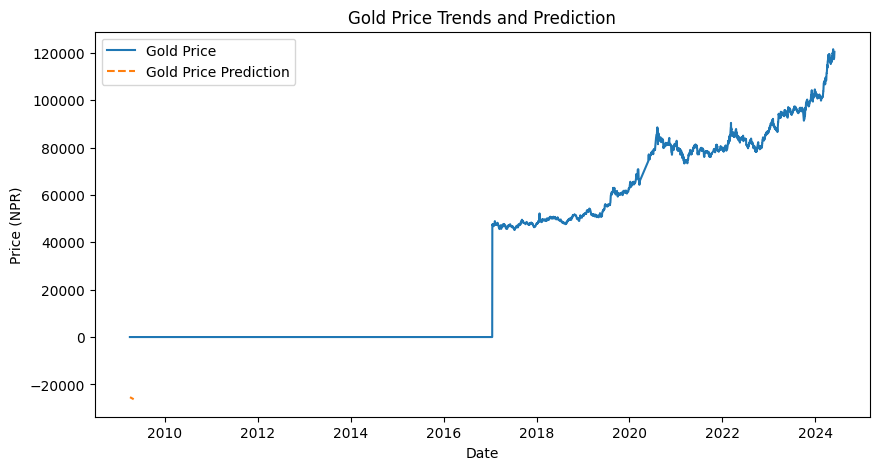

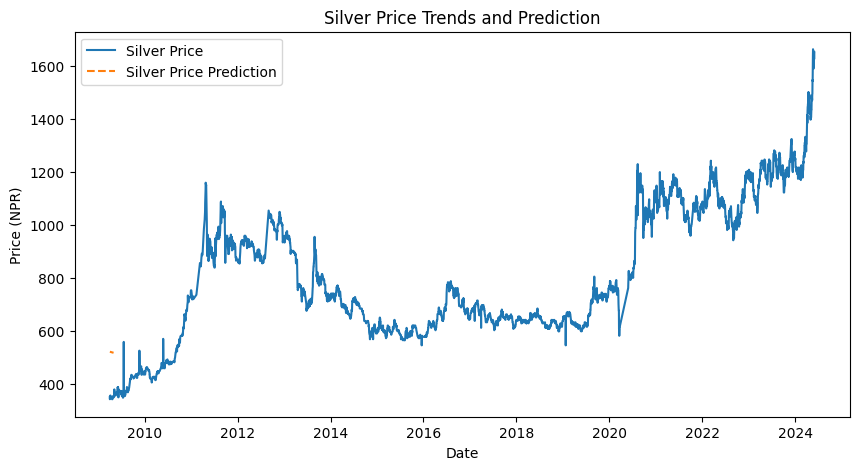

In [ ]:
# Predict future trends for gold and silver

predict_future(gold_dates, gold_values, 'Gold Price')

predict_future(gold_dates, silver_values, 'Silver Price')


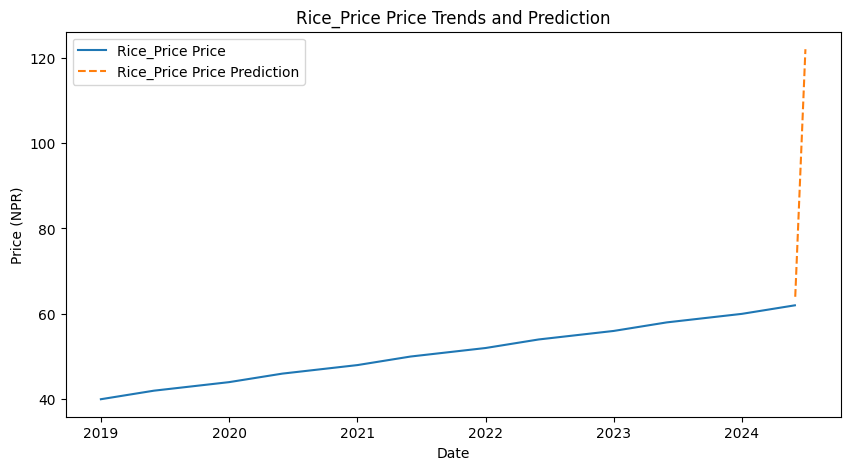

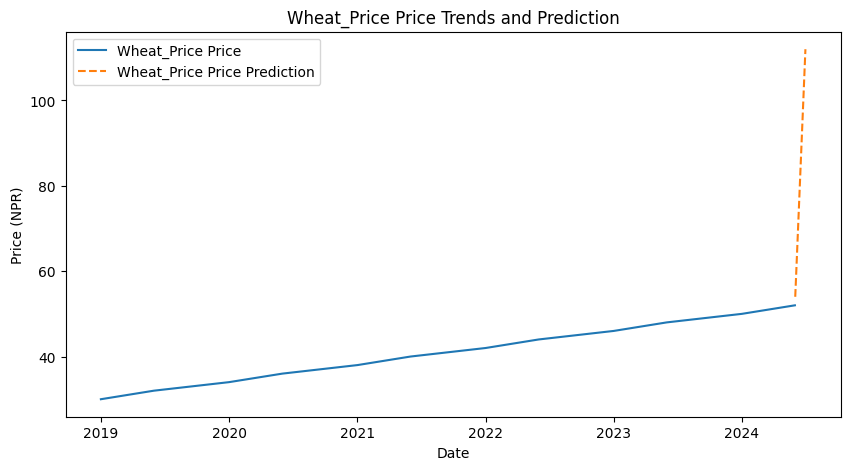

In [ ]:
# Predict future trends for commodities
for commodity, values in commodity_values.items():
    predict_future(commodity_dates, values, f'{commodity} Price')